### Treść zadania

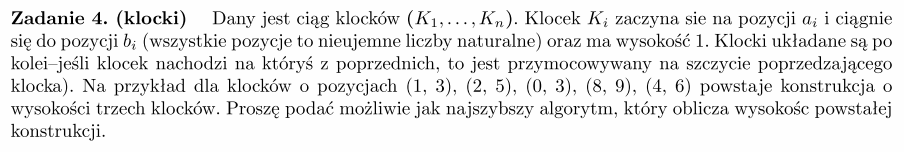

# Sposób I
## (Algorytm dynamiczny)

### Omówienie algorytmu

Idea jest dosyć prosta i algorytm polega na tym, aby przechodzić kolejno przez listę klocków w takiej kolejności, w jakiej otrzymaliśmy je na wejściu, czyli w kolejności spadania. Dla każdego kolejnego klocka sprawdzamy wszystkie klocki, które już spadły przed nim i badamy, jaka by była wysokość najwyższej wieży, zakończonej bieżącym klockiem, która by spadła na któryś z poprzednich klocków. Zastanawiające może być to, w jaki sposób stwierdzimy, czy nad klockiem, który w danym momencie sprawdzamy, nie istnieje inny klocek. Ale czy my musimy to sprawdzać? Odpowiedź jest prosta - nie musimy. Wynika to stąd, że jeżeli istnieje nad danym klockiem inny klocek, który jest gdzieś przylepiony na boku i wisi nad danym klockiem, to i tak w którejś z kolejnych iteracji to wykryjemy, jeżeli bieżący klocek rzeczywiście pokrywa się z tym wiszącym klockiem. Spójrzmy na przykład rozmuowania, który obrazuje, w jaki sposób sprawdzamy kolejne klocki: <br>
(Tam dla klocku w kroku zerowym powinien też być przypadek, gdy tego klocka jeszcze nie ma - zanim do niego doszliśmy)
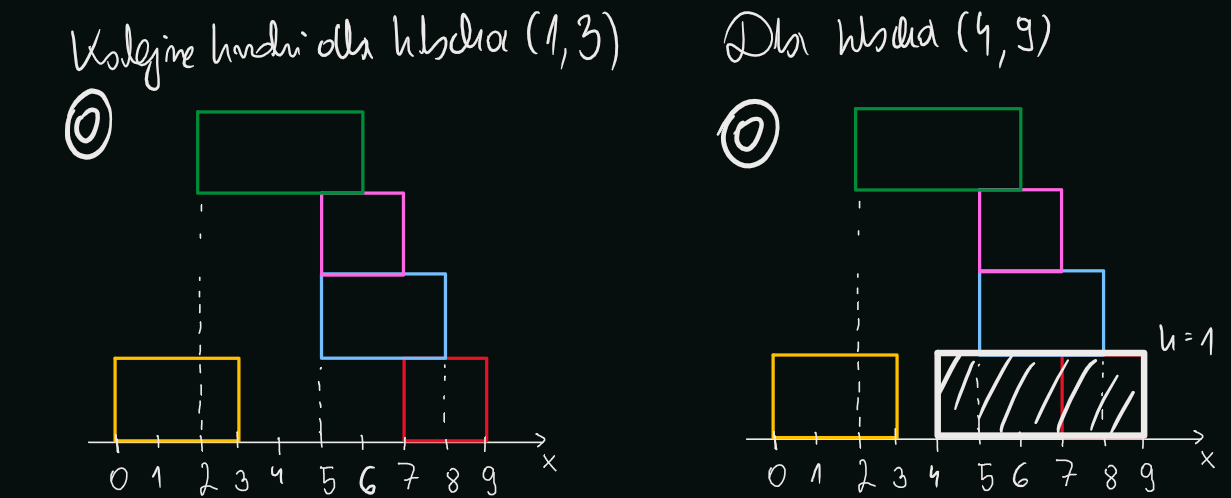
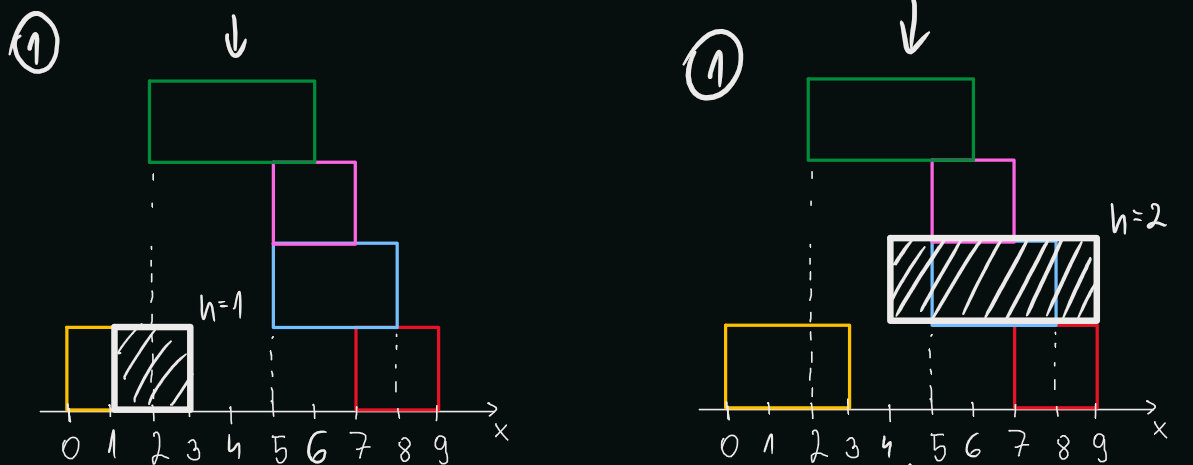
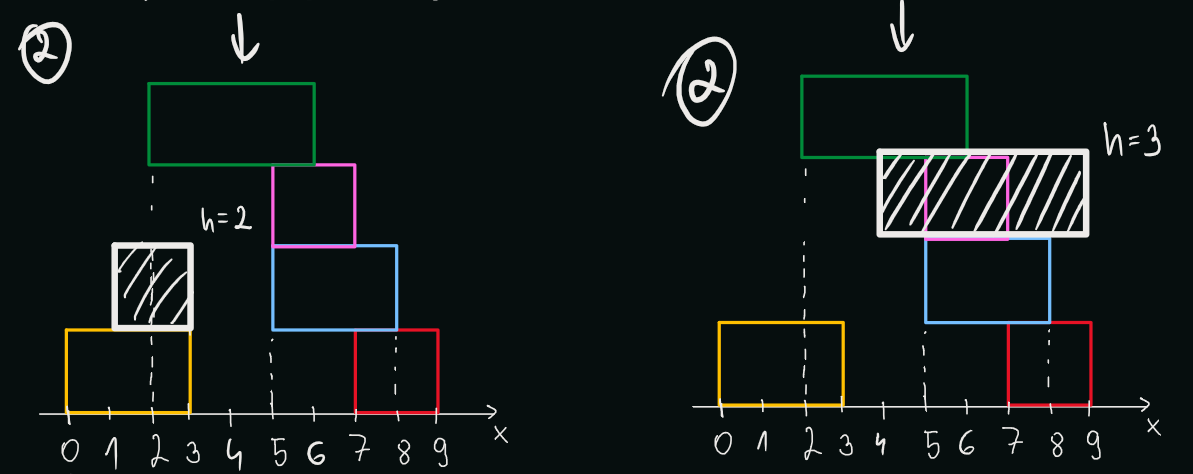
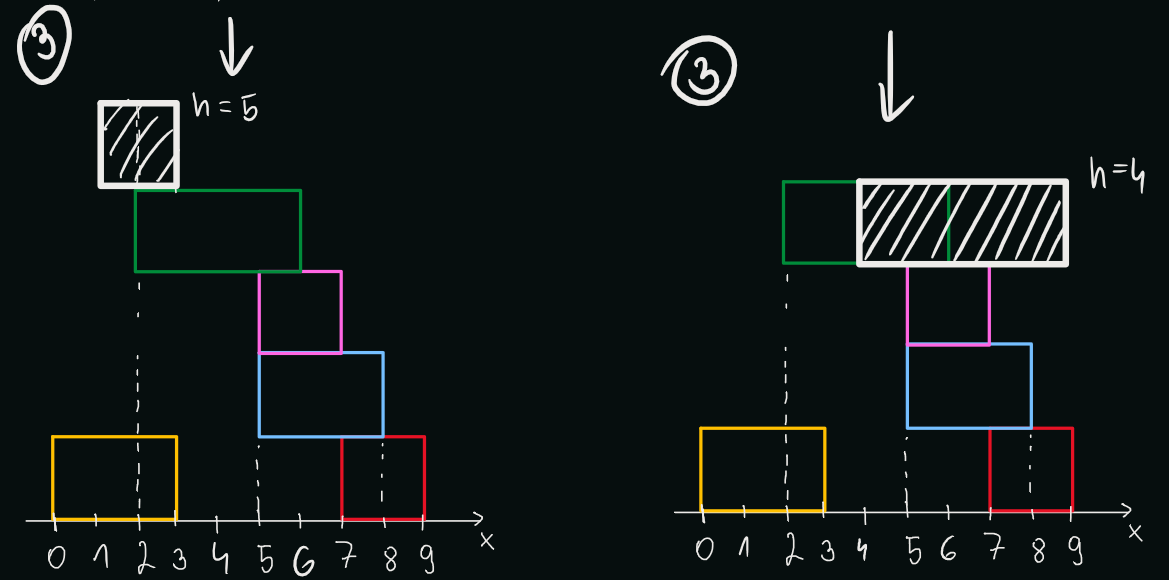
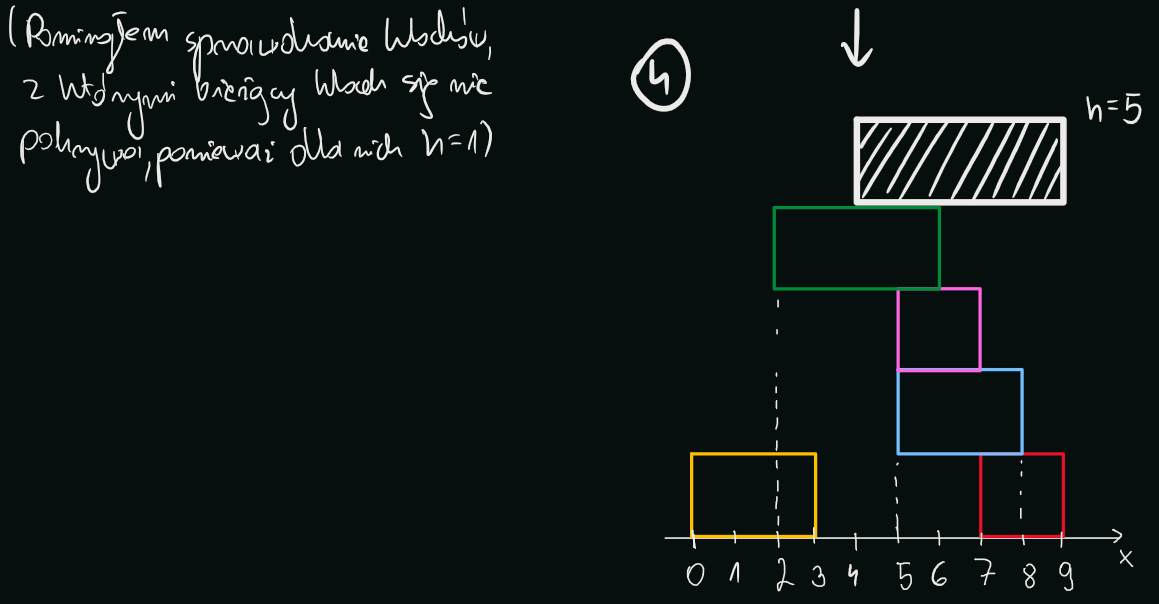

### Złożoność

###### Obliczeniowa:
$ O(n^2) $ - dla każdego z klocków przechodzimy przez wszystkie poprzednie i sprawdzamy, jaką najwyższą wieżę może on utworzyć, spadając na którąś z już istniejących wież.
###### Pamięciowa:
$ O(n) $ - zapisujemy wysokości wież, jakie kończą się danym klockiem.

### Implementacja

In [1]:
def overlap(A: 'first brick', B: 'second brick'):
    return B[0] <= A[0] < B[1] or B[0] < A[1] <= B[1] or (A[0] <= B[0] and A[1] >= B[1])


def max_height(B: 'array of bricks coordinates'):
    n = len(B)
    heights = [1] * n
    
    # Check on which previous brick can the current brick fall
    for i in range(1, n):
        for j in range(i):
            if overlap(B[i], B[j]):
                heights[i] = max(heights[i], heights[j] + 1)
                
#     print(heights)
                
    return max(heights)

###### Kilka testów

In [2]:
B = [(1, 3), (2, 5), (0, 3), (8, 9), (4, 6)]

print(max_height(B))

3


In [3]:
B = [(7, 9), (5, 8), (0, 3), (5, 7), (2, 8), (1, 3)]  # Z pierwszego przykładu w opisie

print(max_height(B))

5


In [4]:
B = [(7, 9), (5, 8), (0, 3), (5, 7), (2, 8), (4, 9)]  # Z drugiego przykładu w opisie

print(max_height(B))

5


# Sposób II
## (Z wykorzystaniem drzewa przedziałowego)

### Implementacja

In [5]:
class Node:
    def __init__(self, key, span):
        self.key = key
        self.span = span
        self.parent = None
        self.height = 0
        self.is_leaf = False
        self.left = self.right = None
        

class BricksTree:
    def __init__(self, spans, insert_spans=False):
        self.root = self.build_tree(self.get_coordinates(spans))
        if insert_spans:
            for span in spans:
                self.insert(span)
        
    def insert(self, brick):
        nodes, max_h = self._get_data(brick)
        max_h += 1
        
        for node in nodes:
            node.is_leaf = True
            while node and node.height < max_h:
                if node.left and node.left.height < max_h:
                    node.left.height = node.height
                elif node.right and node.right.height < max_h:
                    node.right.height = node.height
                node.height = max_h
                node = node.parent
                if not node: break
                node.is_leaf = False
        
    @staticmethod
    def build_tree(values):
        inf = float('inf')
        
        def recur(i, j, l=-inf, r=inf, parent=None):
            # Create a leaf node
            if i > j: 
                node = Node(None, (l, parent.key) if l != parent.key else (parent.key, r))
                node.parent = parent
                return node
            
            mid = (i + j) // 2
            root = Node(values[mid], (l, r))
            root.parent = parent
            root.left  = recur(i, mid - 1, l, values[mid], root)
            root.right = recur(mid + 1, j, values[mid], r, root)
            
            return root
        
        return recur(0, len(values) - 1)
        
    @staticmethod
    def get_coordinates(spans):
        # Create an array of sorted begin-end spans coordinates
        A = [c for span in spans for c in span]
        A.sort()
        # Filter out repeated values
        B = [A[0]]
        for i in range(1, len(A)):
            if A[i] != A[i - 1]:
                B.append(A[i])
        return B
    
    def _get_data(self, span):
        l, r = span
        nodes_list = []
        max_h = 0

        def recur(node):
            nonlocal max_h
            if node.is_leaf: max_h = max(max_h, node.height)
            # If a node represents a span which is contained in the inserted
            # span, we will add this span to a node's intervals list
            if l <= node.span[0] and node.span[1] <= r:
                max_h = max(max_h, node.height)
                nodes_list.append(node)
            # If the current node's key value splits inserted span, we have
            # to go left and right in a tree
            elif l < node.key < r:
                recur(node.left)
                recur(node.right)
            # If the current node's key is on the right side of the inserted
            # span, we have to go left
            elif r <= node.key:
                recur(node.left)
            # If the current node's key is on the left side, we have to go
            # right
            elif node.key <= l:
                recur(node.right)

        recur(self.root)
        return nodes_list, max_h
    
    
def falling_bricks(B: 'array of bricks coordinates'):
    it = BricksTree(B)
    for brick in B:
        it.insert(brick)
    return it.root.height

###### Kilka testów

In [6]:
B = [(1, 3), (2, 5), (0, 3), (8, 9), (4, 6)]

print(falling_bricks(B))

3


In [7]:
B = [(7, 9), (5, 8), (0, 3), (5, 7), (2, 8), (1, 3)]  # Z pierwszego przykładu w opisie

print(falling_bricks(B))

5


In [8]:
B = [(7, 9), (5, 8), (0, 3), (5, 7), (2, 8), (4, 9)]  # Z drugiego przykładu w opisie

print(falling_bricks(B))

5
